<a href="https://colab.research.google.com/github/sagar625/SalaryPrediction/blob/master/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook will predict salary of a new job posting based on model created by historical data.

In [0]:
__author__ = "Sagar Goswami"
__email__ = "sagar7958@gmail.com"

In [0]:
#Getting data from Dropbox 
!curl -L -o SalaryData.zip https://www.dropbox.com/sh/bh5rp4oaao5y8mt/AABpWmMOb4oUFHdJ28nABAo8a?dl=0
!unzip SalaryData.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131M    0  131M    0     0  30.9M      0 --:--:--  0:00:04 --:--:-- 38.5M
Archive:  SalaryData.zip
mapname:  conversion of  failed
 extracting: test_features.csv       
 extracting: train_features.csv      
 extracting: train_salaries.csv      
 extracting: Salary Prediction Interview Assignment.docx  


In [0]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

sns.set(style="darkgrid")



In [0]:
features= pd.read_csv("train_features.csv")
target = pd.read_csv("train_salaries.csv")
features.shape, target.shape


((1000000, 8), (1000000, 2))

In [0]:
features.info()  ,
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [0]:
target.drop_duplicates() , features.drop_duplicates()

(                   jobId  salary
 0       JOB1362684407687     130
 1       JOB1362684407688     101
 2       JOB1362684407689     137
 3       JOB1362684407690     142
 4       JOB1362684407691     163
 ...                  ...     ...
 999995  JOB1362685407682      88
 999996  JOB1362685407683     160
 999997  JOB1362685407684      64
 999998  JOB1362685407685     149
 999999  JOB1362685407686      88
 
 [1000000 rows x 2 columns],
                    jobId companyId  ... yearsExperience milesFromMetropolis
 0       JOB1362684407687    COMP37  ...              10                  83
 1       JOB1362684407688    COMP19  ...               3                  73
 2       JOB1362684407689    COMP52  ...              10                  38
 3       JOB1362684407690    COMP38  ...               8                  17
 4       JOB1362684407691     COMP7  ...               8                  16
 ...                  ...       ...  ...             ...                 ...
 999995  JOB1362685407

In [0]:
training_set_with_label = pd.merge(features,target,on='jobId')

In [0]:
training_set_with_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [0]:
training_set_with_label = training_set_with_label[training_set_with_label['salary'] >0]
training_set_with_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [0]:
training_set_with_label.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [0]:
training_set_with_label.describe(include='object')

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362684627759,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


In [0]:
training_set_with_label.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


In [0]:
training_set_with_label.corr()['salary']

yearsExperience        0.375013
milesFromMetropolis   -0.297686
salary                 1.000000
Name: salary, dtype: float64

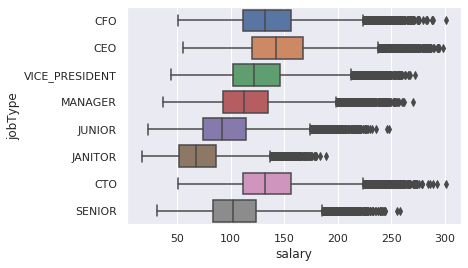

In [0]:
sns.boxplot('salary','jobType',data=training_set_with_label)

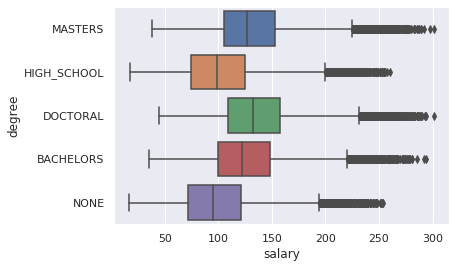

In [0]:
sns.boxplot('salary','degree',data=training_set_with_label)

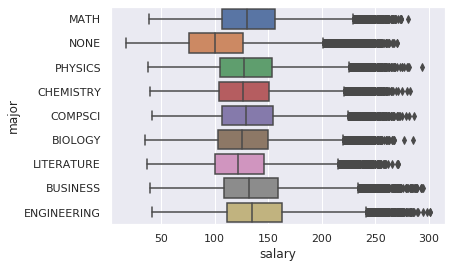

In [0]:
sns.boxplot('salary','major',data=training_set_with_label)

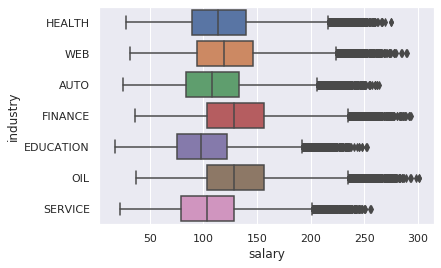

In [0]:
sns.boxplot('salary','industry',data=training_set_with_label)

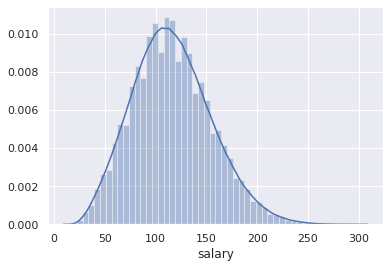

In [0]:
sns.distplot(training_set_with_label['salary'])

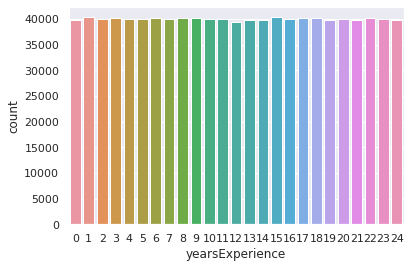

In [0]:
sns.countplot(training_set_with_label['yearsExperience'])

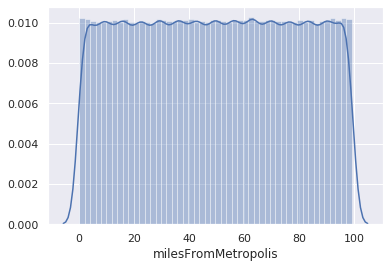

In [0]:
sns.distplot(training_set_with_label['milesFromMetropolis'])

In [0]:
outliers_value = training_set_with_label['salary'].mean()*1.5
outliers_value

174.09359746798734

In [0]:
outliers=training_set_with_label[training_set_with_label['salary']>=outliers_value]
outliers.count()

jobId                  75321
companyId              75321
jobType                75321
degree                 75321
major                  75321
industry               75321
yearsExperience        75321
milesFromMetropolis    75321
salary                 75321
dtype: int64

In [0]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75321 entries, 6 to 999979
Data columns (total 9 columns):
jobId                  75321 non-null object
companyId              75321 non-null object
jobType                75321 non-null object
degree                 75321 non-null object
major                  75321 non-null object
industry               75321 non-null object
yearsExperience        75321 non-null int64
milesFromMetropolis    75321 non-null int64
salary                 75321 non-null int64
dtypes: int64(3), object(6)
memory usage: 5.7+ MB


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

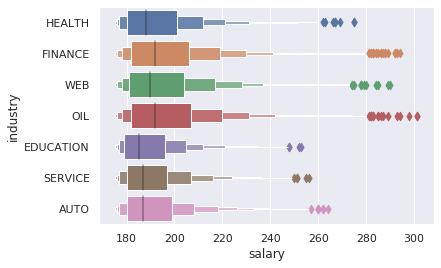

In [0]:
sns.boxenplot('salary','industry',data=outliers)

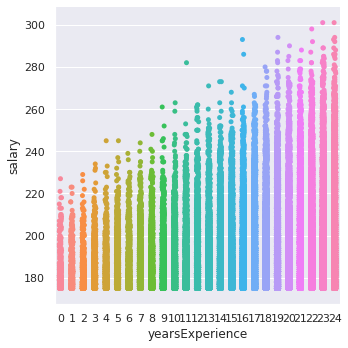

In [0]:
sns.catplot("yearsExperience","salary",data=outliers)

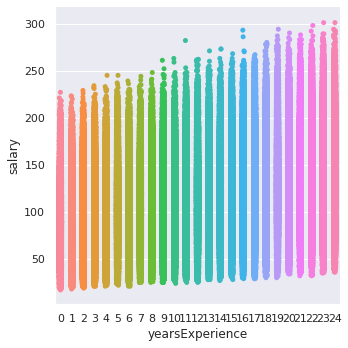

In [0]:
sns.catplot("yearsExperience","salary",data=training_set_with_label)

In [0]:
training_set_with_label.isnull().values.sum()

0

In [0]:
categorical_data= training_set_with_label.iloc[:,:5]
categorical_data.head()

,jobId,companyId,jobType,degree,major
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS


In [0]:
Encoder = LabelEncoder()
encoded_data = training_set_with_label.apply(Encoder.fit_transform)
encoded_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,0,31,1,3,6,3,10,83,113
1,1,11,0,2,7,6,3,73,84
2,2,48,7,1,8,3,10,38,120
3,3,32,5,1,2,0,8,17,125
4,4,60,7,0,8,2,8,16,146


In [0]:
#  scaler = MinMaxScaler()
#  scaled_encoded_df = pd.DataFrame(scaler.fit_transform(encoded_data), columns=encoded_data.columns)
 
#  scaled_encoded_df.head()

In [0]:
#Baseline Regression Model
input_features=encoded_data.drop(columns=['salary','jobId','companyId'])
target=encoded_data['salary']
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.3, random_state=1)

In [0]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regr.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Mean squared error: 927.22
Variance score: 0.38


In [0]:
from sklearn.ensemble import RandomForestRegressor
# criterion='gini'
regr_RF = RandomForestRegressor(max_depth=18, random_state=17, n_jobs=-1,n_estimators=160)
regr_RF.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=-1,
                      oob_score=False, random_state=17, verbose=0,
                      warm_start=False)

In [0]:
y_pred = regr_RF.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Mean squared error: 395.59
Variance score: 0.74


In [0]:
import xgboost

regr_XgBoost = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [39]:
regr_XgBoost.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [40]:
y_pred = regr_XgBoost.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Mean squared error: 355.53
Variance score: 0.76
